<h5>Máster Big Data, Data Science & Inteligencia Artificial 2024-2025 - UCM</h5>
<h6>Profesora:  Rosa Espinola</h6>
<h6>Alumno: Paez Sheridan, Pablo Santiago</h6>
<h6>Materia: Minería de datos y modelización predictiva I </h6>
<h6>Tarea de Minería de datos y modelización predictiva I </h6>

<h2> 2 - Preparacion de Datos </h2>

<h3>Extraccion de datos</h3>

In [3]:
datos = pd.read_excel("../Statement/DatosEleccionesEspaña.xlsx")

<h3>Asignar tipo de datos correctos</h3>

In [4]:
# Asignar tipo de datos correctos

colsFromFloatToInt = ["totalEmpresas", "Industria", "Construccion", "ComercTTEHosteleria", "Servicios", "inmuebles", "Pob2010", "PersonasInmueble"]
colsFromIntToBool = ["Izquierda", "Derecha", "AbstencionAlta"]

for c in colsFromFloatToInt:
    datos[c] = datos[c].fillna(-1)
    datos[c] = datos[c].astype(int)

for c in colsFromFloatToInt:
    datos[c] = datos[c].replace(-1, np.nan)

for c in colsFromIntToBool:
    datos[c] = datos[c].astype(bool)

<h3>3 - Analisis Descriptivo </h3>

In [ ]:
print(analizar_variables_categoricas(datos))
print(cuentaDistintos(datos))
print(datos.describe().T)

In [ ]:
datos[datos.columns].isna().sum()

<h2>4 - Corrección de los errores detectados. </h2>
<h3>Tratamiento de datos incorrectos </h3>

In [7]:
categoricas = ["Densidad", "Population", "Name", "CCAA"]

for c in categoricas:
    datos[c] = datos[c].replace('nan',np.nan)

datos["Densidad"] = datos["Densidad"].replace('?', np.nan)

Vamos a tratar a las variables que representan porcentajes para poner como valor perdido cualquier observación por fuera del rango de un porcentaje (0-100) la unica excepcion es la variable "PobChange_pct" ya que explicitamente esta explicado que los valores negativos aportan informacion

In [8]:
porcentajes = [
    "WomanPopulationPtge", "ForeignersPtge", "SameComAutonPtge", "SameComAutonDiffProvPtge", "DifComAutonPtge",
    "UnemployLess25_Ptge", "Unemploy25_40_Ptge", "UnemployMore40_Ptge", "AgricultureUnemploymentPtge", "IndustryUnemploymentPtge",
    "ConstructionUnemploymentPtge", "ServicesUnemploymentPtge", "AbstentionPtge", "Izda_Pct", "Dcha_Pct", "Otros_Pct", "Age_0-4_Ptge",
    "Age_under19_Ptge", "Age_19_65_pct", "Age_over65_pct"]

for c in porcentajes:
    datos[c] = [x if 0 <= x <= 100 else np.nan for x in datos[c]]

In [9]:

datos["ActividadPpal"] = datos["ActividadPpal"].replace(["Otro"], "Otros")


<h3>Eliminar variables objetivo y codificadora</h3>

<ul>
    <li>Izda Pct: Porcentaje de votos a partidos de izquierda (PSOE y Podemos) </li>
    <li>Izquierda: Variable dicotómica que toma el valor 1 si la suma de los votos de izquierdas es superior a la de derechas y otros y, 0, en otro caso. </li>
</ul>

In [10]:
varObjIzdaPct = datos["Izda_Pct"]
varObjIzquierda = datos["Izquierda"]

datos_input = datos.drop(["Izda_Pct", "Izquierda", "Name", "CodigoProvincia", "Dcha_Pct", "Otros_Pct", "AbstencionAlta", "Derecha"], axis=1)

<h3>5 - Analisis de valores atipicos y perdidos</h3>

In [11]:
numericas_input = datos_input.select_dtypes(include=['int', 'int32', 'int64', 'float', 'float32', 'float64']).columns
categoricas_input = [variable for variable in list(datos_input.columns) if variable not in numericas_input]

calculamos porcentaje de atipicos de cada una de las variables continuas en el conjunto de datos.

In [12]:
pctAtipicosContinuas = {x: atipicosAmissing(datos_input[x])[1]/len(datos_input) for x in numericas_input}

<p>analizando el resultado observamos que las unicas que presentan valores atipicoss algo significativos es son la variable "Otros_Pct"(10.3%), la variable "Population"(9.9%) y "TotalCensus" (9.6%)</p>

<p>Vamos a proceder a pasar los valores atipicos a valores perdidos</p>

In [13]:
for x in numericas_input:
    datos_input[x] = atipicosAmissing(datos_input[x])[0]

Vamos a analizar la proporocion de datos perdidos en cada una de las variables de nuestro conjunto de datos

In [14]:
propMissingPorVariable = datos_input.isna().sum()/len(datos_input)


en este punto podemos observar gran parte de las que presentan un cierto porcentaje significativo de valores perdidos son las tres que ya habiamos observados que tenian valores atipicos y los habiamos transformado a valores perdidos.

Tambien podemos observar que se han sumado una mas "ForeignersPtge" con el 8%

vamos a analizar ahora la cantidad de valores perdidos para cada observacion, para hacer eso extraemos los estadisticos de la proporcion de datos perdidos para las obsevaciones 

In [15]:
datos_input['props_missings'] = datos_input.isna().mean(axis=1)

de esta informacion concluimos que la media de datos perdidos por observacion es del 3% la observacion que mas variable perdidas tiene presenta el 28% de variables perdidas por lo que concluimos que no hace falta eliminar ninguna observacion ya que todas aportan una cantidad significativa de informacion

<h2>6 - Tratamiento de valores atipicos o perdidos </h2>

Las variables categoricas casi no presentan valores perdidos pero para evitar que los pocos que hayan provoquen distorision en la estimacion de la variable objetivo vamos a asignarle valores aleatorios.

En el caso de las variables numericas existen varias con algun porcentaje significativo de valores perdidos, para no perder la distribucion que originalmente presentan tambien vamos a otrgarle valores aleatorios. 

In [ ]:
for x in numericas_input:
    datos_input[x] = ImputacionCuant(datos_input[x], 'aleatorio')

for x in categoricas_input:
    datos_input[x] = ImputacionCuali(datos_input[x], 'aleatorio')

datos_input.isna().sum()

Al finalizar la depuracion guardamos los datos en nuevo fichero para tenerlo listo para trabajar sobre el conservando las fuentes de datos originales por si queremos volver para atras en alguna de las tareas que hicimos para depurar por algun error que hayamos cometido en el proceso

In [17]:
datosEleccionesEspañaDep = pd.concat([varObjIzquierda, varObjIzdaPct, datos_input], axis=1)
with open('datosEleccionesEspañaDep.pickle', 'wb') as archivo:
    pickle.dump(datosEleccionesEspañaDep, archivo)


<h2>7 - Analisis de relaciones entre variables<h2>

In [18]:
with open('datosEleccionesEspañaDep.pickle', 'rb') as f:
    datos_dep=pickle.load(f)

<h3>Variables objetivo con variables predictoras</h3>

Separamos las variables explicativas de las variables objetivo, excluimos las codificadoras

In [69]:
varObjIzdaPct = datos_dep['Izda_Pct']
varObjIzquierda = datos_dep['Izquierda']

datos_input = datos_dep.drop(['Izda_Pct', 'Izquierda', 'CCAA'], axis=1)

nombres_variables = list(datos_input.columns)

<h4>Izquierda</h4>

In [20]:

resultados_izquierda = []
for v in nombres_variables:
    coeficiente_cramer = Vcramer(datos_input[v], varObjIzquierda)
    resultados_izquierda.append((v,coeficiente_cramer))

resultados_izquierda.sort(key=lambda x: x[1], reverse=True)

# Imprimir las variables ordenadas por valor p
print("Izquierda")
print("\nVariables predictoras significativas (ordenadas de mayor a menor asociacion ):\n")
for variable, coeficiente in resultados_izquierda:
    print(f"{variable}: Coeficiente V de Cramer = {coeficiente}")


Izquierda

Variables predictoras significativas (ordenadas de mayor a menor asociacion ):

UnemployLess25_Ptge: Coeficiente V de Cramer = 0.27026828789263174
AgricultureUnemploymentPtge: Coeficiente V de Cramer = 0.2005638668886382
UnemployMore40_Ptge: Coeficiente V de Cramer = 0.18549349056399067
ActividadPpal: Coeficiente V de Cramer = 0.1758742150757248
Explotaciones: Coeficiente V de Cramer = 0.16534907933759058
SUPERFICIE: Coeficiente V de Cramer = 0.16128371973988334
inmuebles: Coeficiente V de Cramer = 0.14513182406183386
Age_over65_pct: Coeficiente V de Cramer = 0.1439988710897809
Population: Coeficiente V de Cramer = 0.14048097271323443
Age_under19_Ptge: Coeficiente V de Cramer = 0.1400798472767252
TotalCensus: Coeficiente V de Cramer = 0.13437239269126097
Pob2010: Coeficiente V de Cramer = 0.1343296339305881
Age_0-4_Ptge: Coeficiente V de Cramer = 0.13082036640640715
Unemploy25_40_Ptge: Coeficiente V de Cramer = 0.128175026286538
Age_19_65_pct: Coeficiente V de Cramer = 0.121

El coefieciente V de Cramer va de 0 a 1 siendo 0 el valor que representa una relacion cercana a nula y 1 una relacion perfecta. Si bien tenemos gran cantidad de variables que aportan informacion explicativa ninguna parece esta fuertemente relacionada con la variable objetivo

<h5>Grafico de similitud de las distribuciones</h5>

<p>A continuacion graficamos una comparativa de las distribuciones de las variables mas y menos significativas (de menos a mas) para Izquierda</p>


<ul>
    <li>Menos significativas: Industria  y Servicios</li>
    <li>Variable mas significativas: UnemployLess25_Ptge y AgricultureUnemploymentPtge</li>
</ul>

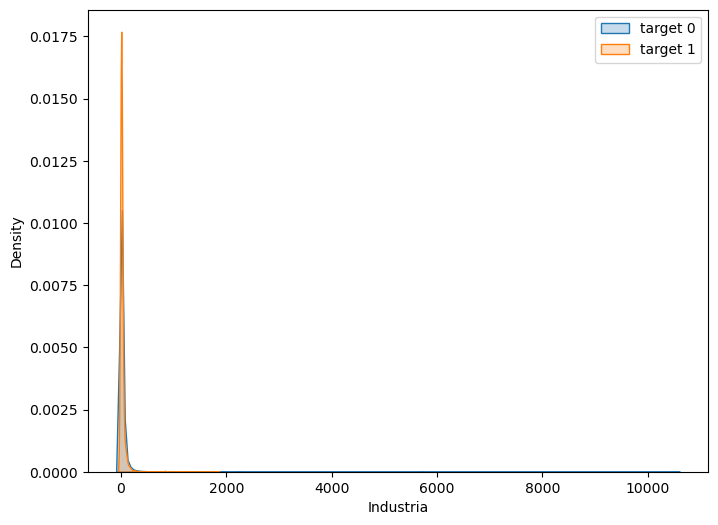

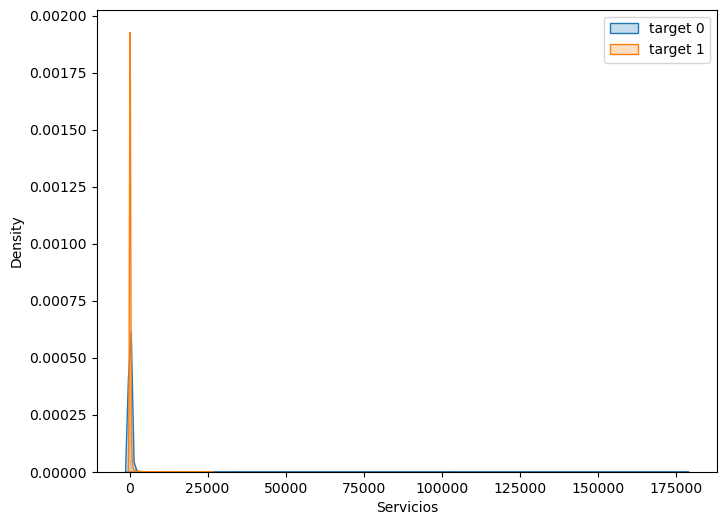

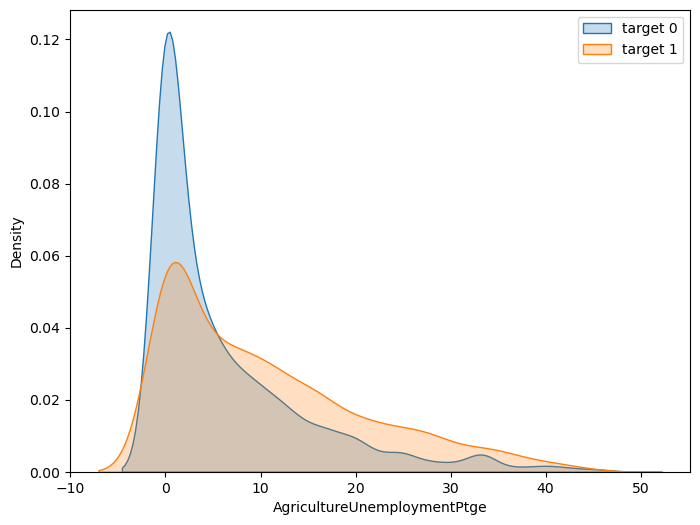

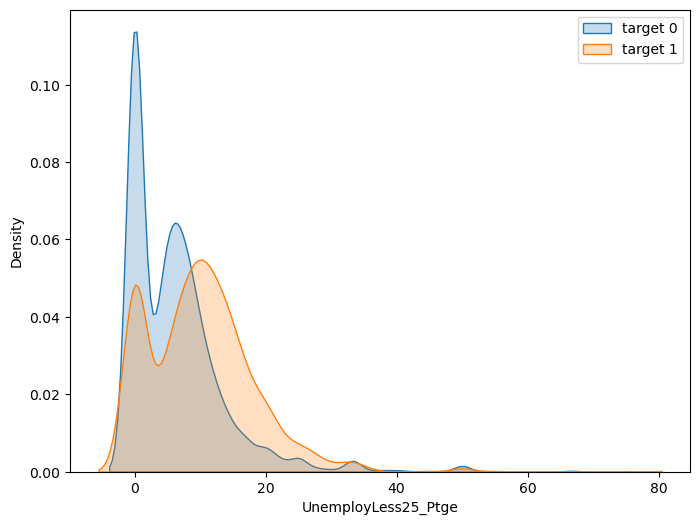

In [71]:
hist_targetbinaria(datos_input['Industria'],varObjIzquierda,'Industria')
hist_targetbinaria(datos_input['Servicios'],varObjIzquierda, 'Servicios')
hist_targetbinaria(datos_input['AgricultureUnemploymentPtge'],varObjIzquierda, 'AgricultureUnemploymentPtge')
hist_targetbinaria(datos_input['UnemployLess25_Ptge'],varObjIzquierda, 'UnemployLess25_Ptge')

<h4>Izda_Pct</h4>

In [22]:
resultados_Izda_Pct = []
for v in nombres_variables:
    coeficiente_cramer = Vcramer(datos_input[v], varObjIzdaPct)
    resultados_Izda_Pct.append((v,coeficiente_cramer))

resultados_Izda_Pct.sort(key=lambda x: x[1], reverse=True)

# Imprimir las variables ordenadas por valor p
print("Izquierda_Pct")
print("\nVariables predictoras significativas (ordenadas de mayor a menor asociacion ):\n")
for variable, coeficiente in resultados_Izda_Pct:
    print(f"{variable}: Coeficiente V de Cramer = {coeficiente}")

Izquierda_Pct

Variables predictoras significativas (ordenadas de mayor a menor asociacion ):

UnemployLess25_Ptge: Coeficiente V de Cramer = 0.2038833982385296
AgricultureUnemploymentPtge: Coeficiente V de Cramer = 0.14451728840335157
AbstentionPtge: Coeficiente V de Cramer = 0.14078541697030386
SameComAutonDiffProvPtge: Coeficiente V de Cramer = 0.12635508439133236
UnemployMore40_Ptge: Coeficiente V de Cramer = 0.12380657156559965
ActividadPpal: Coeficiente V de Cramer = 0.12001904706334858
SUPERFICIE: Coeficiente V de Cramer = 0.11803052494295344
IndustryUnemploymentPtge: Coeficiente V de Cramer = 0.11368794970915934
Age_0-4_Ptge: Coeficiente V de Cramer = 0.11072998895892325
Age_under19_Ptge: Coeficiente V de Cramer = 0.1100519036220996
Age_over65_pct: Coeficiente V de Cramer = 0.10855434008861196
Explotaciones: Coeficiente V de Cramer = 0.10729939713651747
inmuebles: Coeficiente V de Cramer = 0.10420062880271735
PersonasInmueble: Coeficiente V de Cramer = 0.10134820684356964
Popul

<ul>
    <li>Menos significativas: Age_0-4_Ptge  y PersonasInmueble</li>
    <li>Variable mas significativas: UnemployLess25_Ptge y SUPERFICIE</li>
</ul>

<h3>Relaciones entre variables predictoras continuas </h3>

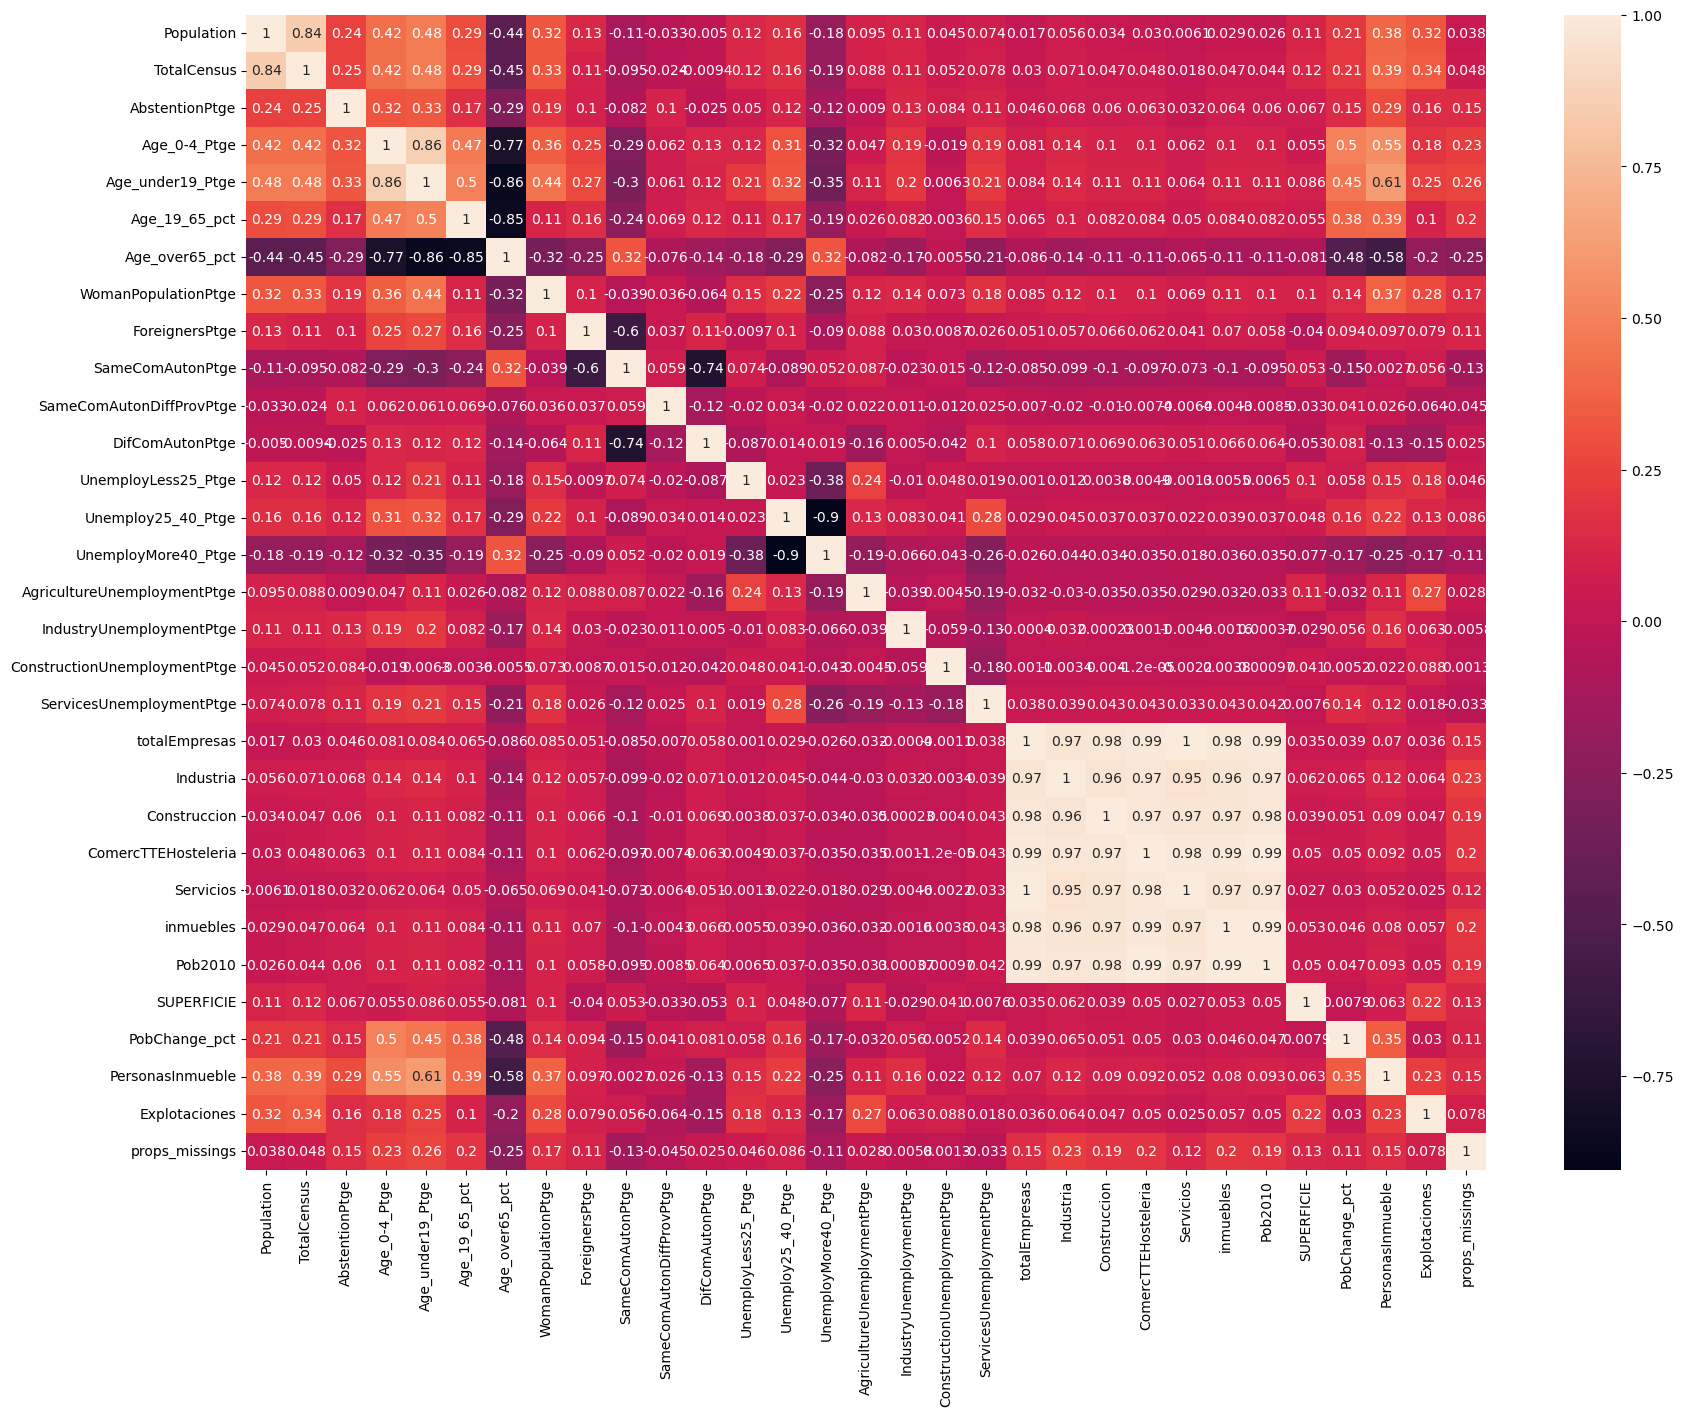

In [23]:
datos_input_continuas = datos_input.drop(['Densidad', 'ActividadPpal'], axis=1)

correlation_matrix = datos_input_continuas.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(20, 15)) 
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Como se puede observar existe una fuertisima correlacion en el siguiente grupo de variables: totalEmpresas, Industria, Construccion, ComercTTEHoteleria, Servicios, inmuebles y pob2010. Al estar tan correladas la informacion que aporten para explicar la variable objetivo probablemente sea redundante entre ellas.

Analizando un poco la relacion que existe entre estas variables y las dos variables objetivos nos damos cuenta que no tienen especial relacion, de hecho (en su mayoria) estan entre las que menos relacion tienen. Debido a esto decidi que voy a remover del conjunto de datos todas menos una de las variables, dejando solo la que mejor desempeño tiene en cuanto a la relacion que presenta con las variables objetivo: "inmuebles"

<h2> 8 - Elaboracion del modelo de Regresion Lineal - Variable Objetivo Izq_Pct</h2>

<h3>Muestras de entrenamiento y Test<h3>

Realizamos las particiones del conjunto de datos para entrenamiento del modelo y test, vamos a tener en cuenta todas las variables que han pasado por nuestra depuracion. Las particiones de datos para entrenamiento y prueba

In [25]:
izq_pct_predictoras_train, izq_pct_predictoras_test, izq_pct_objetivo_train, izq_pct_objetivo_test=train_test_split(
    datos_input, varObjIzdaPct, test_size=0.2, random_state=123456)


variables_predictoras_continuas = ['Population', 'TotalCensus', 'AbstentionPtge', 'Age_0-4_Ptge',
       'Age_under19_Ptge', 'Age_19_65_pct', 'Age_over65_pct',
       'WomanPopulationPtge', 'ForeignersPtge', 'SameComAutonPtge',
       'SameComAutonDiffProvPtge', 'DifComAutonPtge', 'UnemployLess25_Ptge',
       'Unemploy25_40_Ptge', 'UnemployMore40_Ptge',
       'AgricultureUnemploymentPtge', 'IndustryUnemploymentPtge',
       'ConstructionUnemploymentPtge', 'ServicesUnemploymentPtge',
       'inmuebles', 'SUPERFICIE', 'PobChange_pct',
       'PersonasInmueble', 'Explotaciones']

variables_predictoras_categoricas = ['Densidad', 'ActividadPpal']


<h3>Modelos a partir de metodos clasicos de seleccion de variables</h3>

<h5>Metodo Backward</h5>

In [ ]:
rl_izq_pct_backward_aic =  lm_backward(izq_pct_objetivo_train, izq_pct_predictoras_train, variables_predictoras_continuas, variables_predictoras_categoricas, metodo="AIC")

data_rl_izq_pct_backward_aic = crear_data_modelo(izq_pct_predictoras_test, rl_izq_pct_backward_aic['Variables']['cont'], 
                                                rl_izq_pct_backward_aic['Variables']['categ'], 
                                                rl_izq_pct_backward_aic['Variables']['inter'])

In [ ]:
rl_izq_pct_backward_bic =  lm_backward(izq_pct_objetivo_train, izq_pct_predictoras_train, variables_predictoras_continuas, variables_predictoras_categoricas, metodo="BIC")

data_rl_izq_pct_backward_bic = crear_data_modelo(izq_pct_predictoras_test, rl_izq_pct_backward_bic['Variables']['cont'], 
                                                rl_izq_pct_backward_bic['Variables']['categ'], 
                                                rl_izq_pct_backward_bic['Variables']['inter'])

<h5>Metodo Forward</h5>

In [ ]:
rl_izq_pct_forward_aic =  lm_forward(izq_pct_objetivo_train, izq_pct_predictoras_train, variables_predictoras_continuas, variables_predictoras_categoricas, metodo="AIC")

data_rl_izq_pct_forward_aic = crear_data_modelo(izq_pct_predictoras_test, rl_izq_pct_forward_aic['Variables']['cont'], 
                                                rl_izq_pct_forward_aic['Variables']['categ'], 
                                                rl_izq_pct_forward_aic['Variables']['inter'])

In [ ]:
rl_izq_pct_forward_bic =  lm_forward(izq_pct_objetivo_train, izq_pct_predictoras_train, variables_predictoras_continuas, variables_predictoras_categoricas, metodo="BIC")

data_rl_izq_pct_forward_bic = crear_data_modelo(izq_pct_predictoras_test, rl_izq_pct_forward_bic['Variables']['cont'], 
                                                rl_izq_pct_forward_bic['Variables']['categ'], 
                                                rl_izq_pct_forward_bic['Variables']['inter'])

<h5>Método Stepwise</h5>

In [ ]:
rl_izq_pct_stepwise_aic =  lm_stepwise(izq_pct_objetivo_train, izq_pct_predictoras_train, variables_predictoras_continuas, variables_predictoras_categoricas,[],'AIC')

data_rl_izq_pct_stepwise_aic = crear_data_modelo(izq_pct_predictoras_test, rl_izq_pct_stepwise_aic['Variables']['cont'], 
                                                rl_izq_pct_stepwise_aic['Variables']['categ'], 
                                                rl_izq_pct_stepwise_aic['Variables']['inter'])

In [ ]:
rl_izq_pct_stepwise_bic =  lm_stepwise(izq_pct_objetivo_train, izq_pct_predictoras_train, variables_predictoras_continuas, variables_predictoras_categoricas,[],'BIC')

data_rl_izq_pct_stepwise_bic = crear_data_modelo(izq_pct_predictoras_test, rl_izq_pct_stepwise_bic['Variables']['cont'], 
                                                rl_izq_pct_stepwise_bic['Variables']['categ'], 
                                                rl_izq_pct_stepwise_bic['Variables']['inter'])

<h5>Comparativa de los metodos clasicos de seleccion de variables</h5>

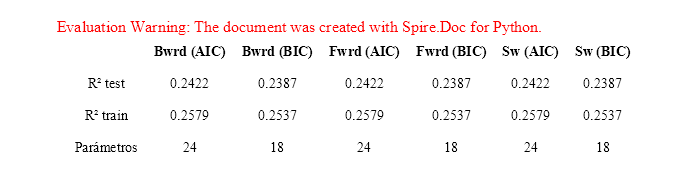

In [72]:
document = Document()
sec = document.AddSection()
paragraph = sec.AddParagraph()
paragraph.AppendHTML(comparative_table_html_izq_pct)

imageStream = document.SaveImageToStreams(0, ImageType.Bitmap)

with open("./comparative_table_img_izq_pct.png",'wb') as imageFile:
    imageFile.write(imageStream.ToArray())
document.Close()

try:
  img = PILImage.open("./comparative_table_img_izq_pct.png")
  bbox = (10,10,700,200) 
  cropped_img = img.crop(bbox)
  cropped_img.save("./comparative_table_img_izq_pct.png") 
  display(Image(filename='./comparative_table_img_izq_pct.png'))
except:
  display(Image(filename='./comparative_table_img_izq_pct.png'))

<h3>Comparacion con metodo aleatorio de seleccion de variables y seleccion del modelo ganador</h3>

Los metodos backward, forward y stepwise son identicos en sus respectivas variantes AIC y BIC y la variabilidad del R² que presentan entre el conjunto de test y train es reducida. Lo que los diferencia es un R² algo superior en las variantes de BIC asi como unos cuantos parametros mas. 

La seleccion no es sencilla porque la diferencia del R² no es tan reducida como para considerarla despreciable asi como el numero de paraemtros es tambien una diferencia considerable, me voy a decantar por tener un menor numero de parametros porque el R² no es muy bajo en ambos modelos, el modelo explica muy mal la variable objetivo para ambos modelos por lo que aunque la diferencia no sea del todo despreciable el R² es tan bajo que no creo que tenga demsiado peso el argumento de la diferencia que hay en la capacidad explicativa de los modelos. Con estas consideraciones elejimos el modelo que utilizo el metodo de seleccion de variables Stepwise con el criterio BIC

In [ ]:
variables_seleccionadas = {
    'Formula': [],
    'Variables': []
}

for x in range(30):
    print('---------------------------- iter: ' + str(x))
    
    x_train2, x_test2, y_train2, y_test2 = train_test_split(izq_pct_predictoras_train, izquierda_objetivo_train, 
                                                            test_size = 0.3, random_state = 1234567 + x)
    
    modelo = lm_stepwise(y_train2.astype(int), x_train2, variables_predictoras_continuas, variables_predictoras_categoricas, [], 'BIC')
    
    variables_seleccionadas['Variables'].append(modelo['Variables'])
    variables_seleccionadas['Formula'].append(sorted(modelo['Modelo'].model.exog_names))

variables_seleccionadas['Formula'] = list(map(lambda x: '+'.join(x), variables_seleccionadas['Formula']))

frecuencias = Counter(variables_seleccionadas['Formula'])
frec_ordenada = pd.DataFrame(list(frecuencias.items()), columns = ['Formula', 'Frecuencia'])
frec_ordenada = frec_ordenada.sort_values('Frecuencia', ascending = False).reset_index()

var_1 = variables_seleccionadas['Variables'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][0])]
var_2 = variables_seleccionadas['Variables'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][1])]


Comparamos el modelo ganador de la seleccion por los metodos clasicos con los dos nuevos modelos.

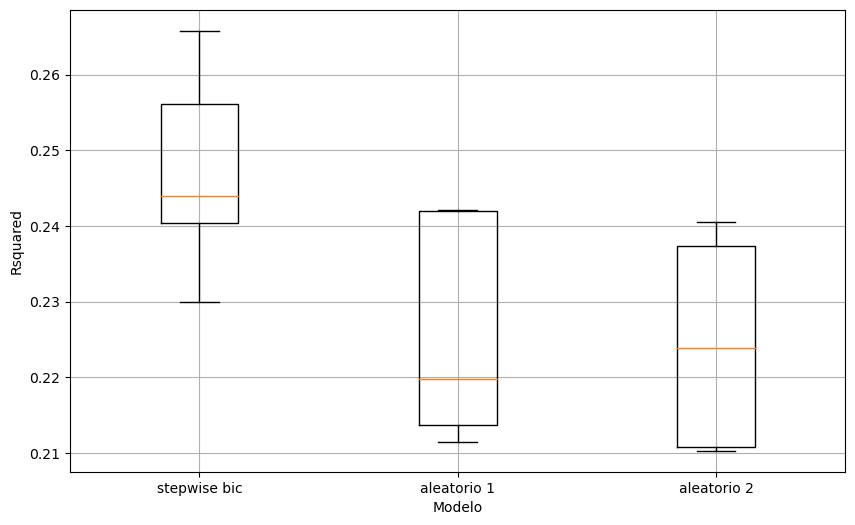

In [ ]:
results = pd.DataFrame({
    'Rsquared': []
    , 'Resample': []
    , 'Modelo': []
})
for rep in range(20):
    modelo1 = validacion_cruzada_lm(
        5
        , izq_pct_predictoras_train
        , izq_pct_objetivo_train
        , rl_izq_pct_stepwise_bic['Variables']['cont']
        , rl_izq_pct_stepwise_bic['Variables']['categ']
        , rl_izq_pct_stepwise_bic['Variables']['inter']
    )
    modelo2 = validacion_cruzada_lm(
        5
        , izq_pct_predictoras_train
        , izq_pct_objetivo_train
        , var_1['cont']
        , var_1['categ']
        , var_1['inter']
    )
    modelo3 = validacion_cruzada_lm(
        5
        , izq_pct_predictoras_train
        , izq_pct_objetivo_train
        , var_2['cont']
        , var_2['categ']
        , var_2['inter']
    )
    
    results_rep = pd.DataFrame({
        'Rsquared': modelo1 + modelo2 + modelo3 
        , 'Resample': ['Rep' + str((rep + 1))]*5*3
        , 'Modelo': [1]*5 + [2]*5 + [3]*5 
    })
    results = pd.concat([results, results_rep], axis = 0)


plt.figure(figsize=(10, 6)) 
plt.grid(True)  

grupo_metrica = results.groupby('Modelo')['Rsquared']
boxplot_data = [grupo_metrica.get_group(grupo).tolist() for grupo in grupo_metrica.groups]

model_labels = ["stepwise bic", "aleatorio 1", "aleatorio 2"]
plt.boxplot(boxplot_data, labels=model_labels)

plt.xlabel('Modelo')  
plt.ylabel('Rsquared')  
plt.show() 


In [ ]:
print("Numero de parametros para stepwise bic: "+ str(len(rl_izq_pct_stepwise_bic['Modelo'].params)))
print("Numero de parametros para modelo con seleccionde varaibles aleatorias 1: " + str(len(var_1['cont'])+len(var_1['categ'])))
print("Numero de parametros para con selccion de variables aleatorio 2: "+ str(len(var_2['cont'])+len(var_2['categ'])))

Numero de parametros para stepwise bic: 18
Numero de parametros para modelo con seleccionde varaibles aleatorias 1: 10
Numero de parametros para con selccion de variables aleatorio 2: 10


Como podemos visualizar en el diagrama de cajas realizado para los modelos aletorios tienen un R² muy similar, los modelos relizados con los metodo de seleccion aleatoria de varaibles
 presenta un r apenas inferior (0.220 y 0.224 vs 0.243 del obtenido por el metodo de seleccion clasica de variables)

 En lo que difieren bastante es en el numero de parametros, donde las variables son considerablemente menos en los modelos obtenidos por el metodo aleatoria de seleccion de variables.

Sin embargo elegimos como modelo ganador al primero obtenido con el metodo clasico de seleccion de variables debido a que tiene el R² mas alto y el numero de parametros no es tan considerable.

<h3>Interpretacion de los modelos ganadores y medicion de calidad<h3>

In [ ]:
rl_izq_pct_stepwise_bic["Modelo"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Izda_Pct   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     129.5
Date:                Wed, 19 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:15:55   Log-Likelihood:                -26484.
No. Observations:                6493   AIC:                         5.300e+04
Df Residuals:                    6475   BIC:                         5.313e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           23.9528      1.995     12.005      0.000      20.042      27.864
UnemployLess25_Ptge              0.3730      0.024     15.614      0.000       0.326       0.420
SameComAutonDiffProvPtge        -0.6238      0.040    -15.485      0.000      -0.703      -0.545
AgricultureUnemploymentPtge      0.2577      0.021     12.416      0.000       0.217       0.298
SUPERFICIE                       0.0002   1.99e-05     11.085      0.000       0.000       0.000
DifComAutonPtge                  0.3683      0.023     15.725      0.000       0.322       0.414
IndustryUnemploymentPtge        -0.1645      0.018     -9.305      0.000      -0.199      -0.130
AbstentionPtge                  -0.2377      0.025     -9.326      0.000      -0.288      -0.188
ForeignersPtge                  -0.2235      0.026     -8.538      0.000      -0.275      -0.172
ConstructionUnemploymentPtge     0.1064      0.016      6.603      0.000       0.075       0.138
Age_19_65_pct                    0.2302      0.031      7.382      0.000       0.169       0.291
Age_0-4_Ptge                    -0.7449      0.119     -6.262      0.000      -0.978      -0.512
Unemploy25_40_Ptge               0.0574      0.009      6.161      0.000       0.039       0.076
Explotaciones                    0.0116      0.002      5.034      0.000       0.007       0.016
ActividadPpal_Construccion      -6.0953      4.334     -1.406      0.160     -14.591       2.401
ActividadPpal_Industria          0.9926      4.332      0.229      0.819      -7.500       9.485
ActividadPpal_Otros             -3.5880      0.529     -6.777      0.000      -4.626      -2.550
ActividadPpal_Servicios         -8.1094      0.756    -10.732      0.000      -9.591      -6.628
==============================================================================
Omnibus:                       50.361   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.660
Skew:                           0.206   Prob(JB):                     9.99e-12
Kurtosis:                       2.866   Cond. No.                     2.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Se puede observar que el parametro ActividadPpal_Industria no es significativo para el modelo, lo ideal seria removerlo pero eso llevaria a recrear todos los modelos devuelta y a volver a evaluarlos, por el limitado plazo que tenemos para este trabajo voy a ignorar este paso pero seria lo mas conveniente para analizar a ver si mejorar el modelo sin esta variable. Algo similar pasa con ActividadPpal_Construccion aunque en menor medida.

Ya que estamos mas familiarizados tomemos los mismos dos parametros que tomamos con la variable predictora izquierda para analizar el significado de sus coeficientes. Recordemos que la variable objetivo Izq_Pct toma valores entre 0 y 100 representando el porcentaje de voto a la izquierda:

<li>UnemployLess25_Ptge: el coeficiente es 0.3730 por lo que podemos decir el porcentaje de desempeados juveniles a contribuir a aumentar el porcentaje de votos de la izquierda. </li>
<br>
<li>ActividadPpal: los coeficientes de la actividad servicios, construccion y otros son negativas (-8.1094, -6.0953, -3.5880 respectivamente) esto significa que si cualquiera de esas actividades son actividades principales en el municipio van a reducir el porcentaje de los votos de la izquierda un 8%, un 6% y un 3.6% respectivamente. La industria en cambio va aumentar ligeramente los votos de la izquierda en un 1%</li>

Ahora vamos a medir la calidad del modelo

In [ ]:
print('R² de train: '+str(Rsq( rl_izq_pct_stepwise_bic['Modelo'], izq_pct_objetivo_train, rl_izq_pct_stepwise_bic['X'])))
print("R² de test: "+str(Rsq(rl_izq_pct_stepwise_bic['Modelo'], izq_pct_objetivo_test, data_rl_izq_pct_stepwise_bic)))
print("nro de parametros: "+ str(len(rl_izq_pct_backward_bic["Modelo"].params)))

R² de train: 0.2538026182030525
R² de test: 0.23791412002920964
nro de parametros: 18


Como podemos observar en la tabla resumen y en el R² de test y de train el modelo tiene una buena cohesion debido a una baja varaibilidad entre los R² de test y train asi como un numero de parametros aceptable.

El estadistico F nos indica que en el modelo hay evidencia estadistica solida para indicar que al menos una variable explica a la variable objetivo. Por otro lado podemos ver que casi todas las variables son significativas para el modelo pero hay dos que no lo son: ActividadPpal_Industria y ActividadPpal_Construccion en ambos casos el estadistico nos indica que es probable que no esten aportando informacion al modelo.

Es no menor indicar que el R² es muy bajo, demasiado bajo, por lo que es probable que explica poco a la variable objetivo y el error en las predicciones sea muy alto. Para mejorarlo se pueden hacer ciertas modificaciones como por ejemplo transformar las variables numericas, yo uso una herramienta en mi IDE que me permite ver las distribuciones de las variables y pude observar que hay varias con valores muy condensados por lo que una transoformacion logaritmica contribuiria a dispersar los valores, como ese ejemplo se pueden hacer muchas cosas que hagan que las variables explicativas aporten mas informacion aumetando la capacidad explicativa del modelo

<h2>9 - Regresion Logistica - Variable objetivo Izquierda</h2>

<h3><h3>Muestras de entrenamiento y Test<h3></h3>

In [36]:
izquierda_predictoras_train, izquierda_predictoras_test, izquierda_objetivo_train, izquierda_objetivo_test=train_test_split(
    datos_input, varObjIzquierda, test_size=0.2, random_state=123456)


variables_predictoras_continuas = ['Population', 'TotalCensus', 'AbstentionPtge', 'Age_0-4_Ptge',
       'Age_under19_Ptge', 'Age_19_65_pct', 'Age_over65_pct',
       'WomanPopulationPtge', 'ForeignersPtge', 'SameComAutonPtge',
       'SameComAutonDiffProvPtge', 'DifComAutonPtge', 'UnemployLess25_Ptge',
       'Unemploy25_40_Ptge', 'UnemployMore40_Ptge',
       'AgricultureUnemploymentPtge', 'IndustryUnemploymentPtge',
       'ConstructionUnemploymentPtge', 'ServicesUnemploymentPtge',
       'inmuebles', 'SUPERFICIE', 'PobChange_pct',
       'PersonasInmueble', 'Explotaciones']

variables_predictoras_categoricas = ['Densidad', 'ActividadPpal']

<h3> Seleccion de variables predictoras por metodos clasicos <h3>

<h4>Metodo Backward</h4>

In [ ]:
glm_izquierda_backward_aic =  glm_backward(izquierda_objetivo_train, izquierda_predictoras_train, variables_predictoras_continuas, variables_predictoras_categoricas, metodo="AIC")

data_glm_izquierda_backward_aic = crear_data_modelo(izquierda_predictoras_test, glm_izquierda_backward_aic['Variables']['cont'], 
                                                glm_izquierda_backward_aic['Variables']['categ'], 
                                                glm_izquierda_backward_aic['Variables']['inter'])

In [ ]:
glm_izquierda_backward_bic =  glm_backward(izquierda_objetivo_train, izquierda_predictoras_train, variables_predictoras_continuas, variables_predictoras_categoricas, metodo="BIC")

data_glm_izquierda_backward_bic = crear_data_modelo(izquierda_predictoras_test, glm_izquierda_backward_bic['Variables']['cont'], 
                                                glm_izquierda_backward_bic['Variables']['categ'], 
                                                glm_izquierda_backward_bic['Variables']['inter'])

<h4>Metodo Forward</h4>

In [ ]:
glm_izquierda_forward_aic =  glm_forward(izquierda_objetivo_train, izquierda_predictoras_train, variables_predictoras_continuas, variables_predictoras_categoricas, metodo="AIC")

data_glm_izquierda_forward_aic = crear_data_modelo(izquierda_predictoras_test, glm_izquierda_forward_aic['Variables']['cont'], 
                                                glm_izquierda_forward_aic['Variables']['categ'], 
                                                glm_izquierda_forward_aic['Variables']['inter'])

In [ ]:
glm_izquierda_forward_bic =  glm_forward(izquierda_objetivo_train, izquierda_predictoras_train, variables_predictoras_continuas, variables_predictoras_categoricas, metodo="BIC")

data_glm_izquierda_forward_bic = crear_data_modelo(izquierda_predictoras_test, glm_izquierda_forward_bic['Variables']['cont'], 
                                                glm_izquierda_forward_bic['Variables']['categ'], 
                                                glm_izquierda_forward_bic['Variables']['inter'])

<h4>Metodo Stepwise</h4>

In [ ]:
glm_izquierda_stepwise_aic =  glm_stepwise(izquierda_objetivo_train, izquierda_predictoras_train, variables_predictoras_continuas, variables_predictoras_categoricas, metodo="AIC")

data_glm_izquierda_stepwise_aic = crear_data_modelo(izquierda_predictoras_test, glm_izquierda_stepwise_aic['Variables']['cont'], 
                                                glm_izquierda_stepwise_aic['Variables']['categ'], 
                                                glm_izquierda_stepwise_aic['Variables']['inter'])

In [ ]:
glm_izquierda_stepwise_bic =  glm_stepwise(izquierda_objetivo_train, izquierda_predictoras_train, variables_predictoras_continuas, variables_predictoras_categoricas, metodo="BIC")

data_glm_izquierda_stepwise_bic = crear_data_modelo(izquierda_predictoras_test, glm_izquierda_stepwise_bic['Variables']['cont'], 
                                                glm_izquierda_stepwise_bic['Variables']['categ'], 
                                                glm_izquierda_stepwise_bic['Variables']['inter'])

<h5>Comparativa de los metodos clasicos de seleccion de variables</h5>

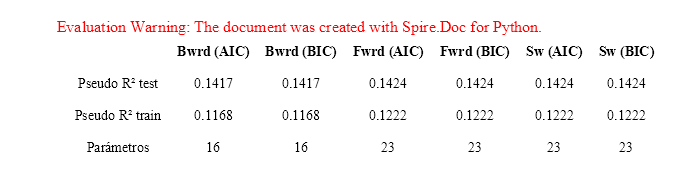

In [44]:
document = Document()
sec = document.AddSection()
paragraph = sec.AddParagraph()
paragraph.AppendHTML(comparative_table_html_izquierda)

imageStream = document.SaveImageToStreams(0, ImageType.Bitmap)

with open("./comparative_table_img_izquierda.png",'wb') as imageFile:
    imageFile.write(imageStream.ToArray())
document.Close()

try:
  img = PILImage.open("./comparative_table_img_izquierda.png")
  bbox = (10,10,700,200) 
  cropped_img = img.crop(bbox)
  cropped_img.save("./comparative_table_img_izquierda.png") 
  display(Image(filename='./comparative_table_img_izquierda.png'))
except:
  display(Image(filename=C))

<h3>Comparacion con metodo aleatorio de seleccion de variables y seleccion del modelo ganador</h3>

El pseudo r2 obtenido no es malo en ninguno de los casos indicandonos que el modelo tiene una capacidad explicativa de la variable objetivo significativa sin embargo la diferencia entre el pseudo r2 de train y de test no es tan despreciable (siguiendo la referencia que las diferencias en el pseudo r2 son mas significativas que el r2) pero estas diferencias son consistentenes y equivalentes en todos los metodos de selecion de variables por lo que no lo tenemos en cuenta a la hora de decidir el modelo.

Elegimos el modelo generado a partir de el metodo de seleccion de variables stepwise siguiendo el criterio BIC debido a que el pseudo r2 es mayor (empatados con los de forward en todo), si bien es cierto que la diferencia no es grande recordemos que el pseudo r2 siempre es bastante mas bajo que el r2 de una regresion lineal. Debido a esto la diferencia en una menor cantidad de parametros no es suficiente como para decantarnos por los modelos backward.

In [ ]:
variables_seleccionadas = {
    'Formula': [],
    'Variables': []
}

for x in range(10):
    print('---------------------------- iter: ' + str(x))
    
    x_train2, x_test2, y_train2, y_test2 = train_test_split(izquierda_predictoras_train, izquierda_objetivo_train, 
                                                            test_size = 0.3, random_state = 1234567 + x)
    
    modelo = glm_stepwise(y_train2.astype(int), x_train2, variables_predictoras_continuas, variables_predictoras_categoricas, [], 'BIC')
    
    variables_seleccionadas['Variables'].append(modelo['Variables'])
    variables_seleccionadas['Formula'].append(sorted(np.append(modelo['Modelo'].feature_names_in_,'const')))

variables_seleccionadas['Formula'] = list(map(lambda x: '+'.join(x), variables_seleccionadas['Formula']))

frecuencias = Counter(variables_seleccionadas['Formula'])
frec_ordenada = pd.DataFrame(list(frecuencias.items()), columns = ['Formula', 'Frecuencia'])
frec_ordenada = frec_ordenada.sort_values('Frecuencia', ascending = False).reset_index()

var_1 = variables_seleccionadas['Variables'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][0])]
var_2 = variables_seleccionadas['Variables'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][1])]

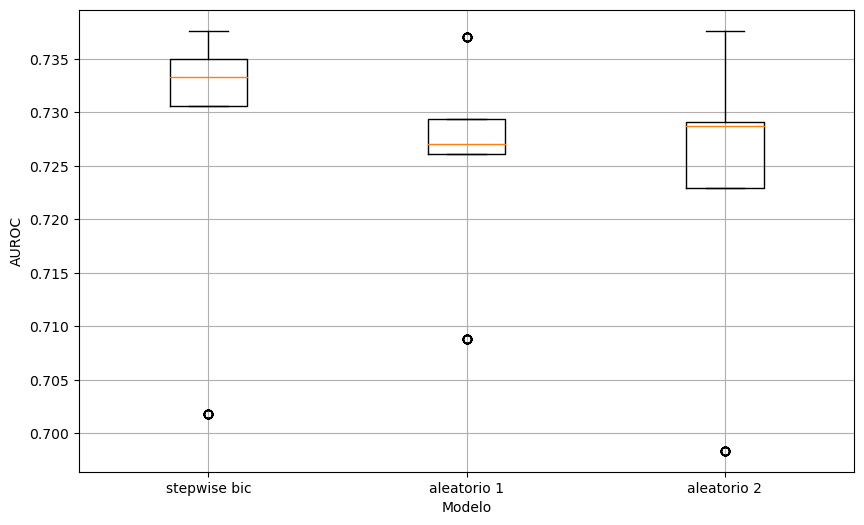

In [46]:
results = pd.DataFrame({
    'Puntuaciones ROC': []
    , 'Resample': []
    , 'Modelo': []
})
for rep in range(20):
    modelo1 = validacion_cruzada_glm(
        5
        , izquierda_predictoras_train
        , izquierda_objetivo_train
        , glm_izquierda_stepwise_bic['Variables']['cont']
        , glm_izquierda_stepwise_bic['Variables']['categ']
        , glm_izquierda_stepwise_bic['Variables']['inter']
    )
    modelo2 = validacion_cruzada_glm(
        5
        , izquierda_predictoras_train
        , izquierda_objetivo_train
        , var_1['cont']
        , var_1['categ']
        , var_1['inter']
    )
    modelo3 = validacion_cruzada_glm(
        5
        , izquierda_predictoras_train
        , izquierda_objetivo_train
        , var_2['cont']
        , var_2['categ']
        , var_2['inter']
    )
    
    results_rep = pd.DataFrame({
        'Puntuaciones ROC': modelo1 + modelo2 + modelo3 
        , 'Resample': ['Rep' + str((rep + 1))]*5*3
        , 'Modelo': [1]*5 + [2]*5 + [3]*5 
    })
    results = pd.concat([results, results_rep], axis = 0)


plt.figure(figsize=(10, 6)) 
plt.grid(True)  

grupo_metrica = results.groupby('Modelo')['Puntuaciones ROC']
boxplot_data = [grupo_metrica.get_group(grupo).tolist() for grupo in grupo_metrica.groups]

model_labels = ["stepwise bic", "aleatorio 1", "aleatorio 2"]
plt.boxplot(boxplot_data, labels=model_labels)

plt.xlabel('Modelo')  
plt.ylabel('AUROC')  
plt.show() 


Seleccionamos como modelo ganador a el obtenido por <b>el metodo de seleccion clasica de variables stepwise siguiendo el criterio BIC </b> al ser el que tiene el pseudo r cuadrado mas alto de los tres

<h3> Evaluacion del modelo ganador </h3>

In [55]:
print('Pseudo R² de train: '+str(pseudoR2(glm_izquierda_stepwise_bic['Modelo'],glm_izquierda_stepwise_bic['X'],izquierda_objetivo_train)))
print("Pseudo R² de test: "+str(pseudoR2(glm_izquierda_stepwise_bic['Modelo'],data_glm_izquierda_stepwise_bic,izquierda_objetivo_test)))
print("nro de parametros: "+ str(len(glm_izquierda_stepwise_bic["Modelo"].coef_[0])))

Optimization terminated successfully.
         Current function value: 0.532797
         Iterations 5
Pseudo R² de train: 0.12219633461816182
Optimization terminated successfully.
         Current function value: 0.521175
         Iterations 5
Pseudo R² de test: 0.14235332598292294
nro de parametros: 23


El pseudoR2 es elevado y se corresponse con el AUROC que tambien es elevado. por lo que podemos decir que estamos frente a un modelo que (al menos frente a los datos de test) demuestra tener una buena capacidad predictiva.

<h4> Obtener punto de corte optimo para el modelo ganador</h4>

Vamos a obtener el mejor punto de corte para el modelo ganador de manera tal que maximicemos la sensibilidad y la especificidad del mismo, usaremos el indice de Youden para obtener la mejor rejilla de punto de corte

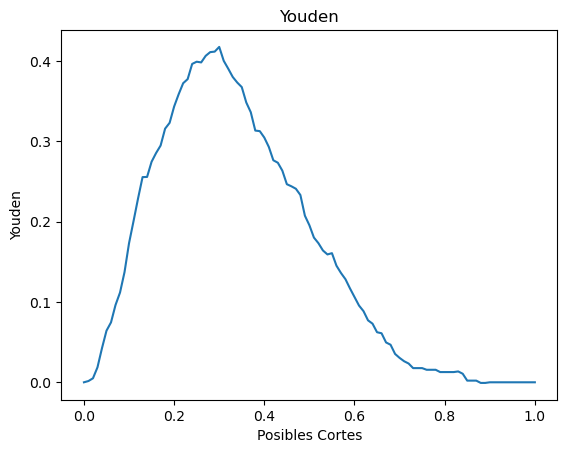

Punto de corte optimo para el modelo de regresion logistica ganador: 0.3


In [64]:
#Generamos una rejilla de puntos de corte
posiblesCortes = np.arange(0, 1.01, 0.01).tolist()  # Generamos puntos de corte de 0 a 1 con intervalo de 0.01
rejilla = pd.DataFrame({
    'PtoCorte': [],
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'PosPredValue': [],
    'NegPredValue': []
})  # Creamos un DataFrame para almacenar las métricas para cada punto de corte

for pto_corte in posiblesCortes:  # Iteramos sobre los puntos de corte
    rejilla = pd.concat(
        [rejilla, sensEspCorte(glm_izquierda_stepwise_bic['Modelo'], izquierda_predictoras_test, izquierda_objetivo_test, pto_corte,
         glm_izquierda_stepwise_bic['Variables']['cont'], glm_izquierda_stepwise_bic['Variables']['categ'])],
        axis=0
    )  # Calculamos las métricas para el punto de corte actual y lo agregamos al DataFrame

rejilla['Youden'] = rejilla['Sensitivity'] + rejilla['Specificity'] - 1  # Calculamos el índice de Youden
rejilla.index = list(range(len(rejilla)))  # Reindexamos el DataFrame para que los índices sean consecutivos



plt.plot(rejilla['PtoCorte'], rejilla['Youden'])
plt.xlabel('Posibles Cortes')
plt.ylabel('Youden')
plt.title('Youden')
plt.show()

print("Punto de corte optimo para el modelo de regresion logistica ganador: "+ str(rejilla['PtoCorte'][rejilla['Youden'].idxmax()]))


Evaluamos el modelo en el punto optimo de corte optimo que hallamos anteriormente, comparamos el desmpeño del mismo con los conjuntos de datos de test y train.

In [67]:
print(sensEspCorte(glm_izquierda_stepwise_bic['Modelo'], izquierda_predictoras_train, izquierda_objetivo_train, 0.3, glm_izquierda_stepwise_bic['Variables']['cont'], glm_izquierda_stepwise_bic['Variables']['categ']))
print(sensEspCorte(glm_izquierda_stepwise_bic['Modelo'], izquierda_predictoras_test, izquierda_objetivo_test, 0.3, glm_izquierda_stepwise_bic['Variables']['cont'], glm_izquierda_stepwise_bic['Variables']['categ']))

   PtoCorte  Accuracy  Sensitivity  Specificity  PosPredValue  NegPredValue
0       0.3  0.757123     0.516107     0.826977       0.46367      0.855001
   PtoCorte  Accuracy  Sensitivity  Specificity  PosPredValue  NegPredValue
0       0.3  0.785099     0.574286     0.843014      0.501247      0.878168


Las medidas de rendimiento se muestran estables entre los conjunto de datos de prueba y entrenamiento. El modelo presenta un sensibilidad buena y una especificdad destacable dando como resultado un modelo con una buena performance y del que se puede esperar que sea consistente a futuro debido a su buen rendimiento con el conjunto de pruebas.

Poniendo en contezto con la variable objetivo nuestro modelo demuestra una capacidad moderada de  identificar correctamente aquellos casos en los que la suma de votos de izquierdas es superior a la de derechas y otros (sensibilidad) y una destacable capacidad de identificar correctamente aquellos casos en los que la suma de votos de derechas y otros es superior a la de izquierdas (especificidad)

<h3>Descripcion del modelo ganador</h3>

Veamos los coeficientes del modelo para poder interpretarlo

In [ ]:

coeficientes = glm_izquierda_stepwise_bic['Modelo'].coef_
nombres_caracteristicas = crear_data_modelo(izquierda_predictoras_train, glm_izquierda_stepwise_bic['Variables']['cont'], glm_izquierda_stepwise_bic['Variables']['categ']).columns  # Suponiendo que X_train es un DataFrame de pandas

for nombre, coef in zip(nombres_caracteristicas, coeficientes[0]):
    print(f"Variable: {nombre}, Coeficiente: {coef}")


Variable: UnemployLess25_Ptge, Coeficiente: 0.03656574929793677
Variable: AgricultureUnemploymentPtge, Coeficiente: 0.031387029661939986
Variable: SameComAutonDiffProvPtge, Coeficiente: -0.06500168950437221
Variable: ForeignersPtge, Coeficiente: -0.030974234692187536
Variable: Age_19_65_pct, Coeficiente: 0.05021245274391037
Variable: SUPERFICIE, Coeficiente: 1.482435709288962e-05
Variable: DifComAutonPtge, Coeficiente: 0.044132743623585866
Variable: IndustryUnemploymentPtge, Coeficiente: -0.020698755643294604
Variable: Explotaciones, Coeficiente: 0.0012097063221796864
Variable: ConstructionUnemploymentPtge, Coeficiente: 0.008961749639822445
Variable: PobChange_pct, Coeficiente: -0.01192603960223333
Variable: Age_under19_Ptge, Coeficiente: 0.048916153621468395
Variable: Age_0-4_Ptge, Coeficiente: -0.1201125242288002
Variable: Unemploy25_40_Ptge, Coeficiente: 0.004472435710327706
Variable: AbstentionPtge, Coeficiente: 0.011678443342330558
Variable: SameComAutonPtge, Coeficiente: 0.018101

Tomemos una varaible predictora categorica y una numerica e interpretemos sus coeficientes:

<li>UnemployLess25_Ptge: esta variable tiene un  coeficiente positivo de ~ 0.036 sugiere que un aumento en el porcentaje de desempleados menores de 25 años está asociado con un aumento en la probabilidad de que la suma de votos de izquierdas sea superior a la de derechas.</li>
<br>
<li>ActividadPpal: todos los coefieicentes de las variables dummy de actividad principal son negativos por lo que sugieren que estas acividades  están asociadas con una disminución en la probabilidad de que la suma de votos de izquierdas sea superior a la de derechas. </li>